# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\alanz\AppData\Local\Temp\ipykernel_35800\1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53
...,...
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76


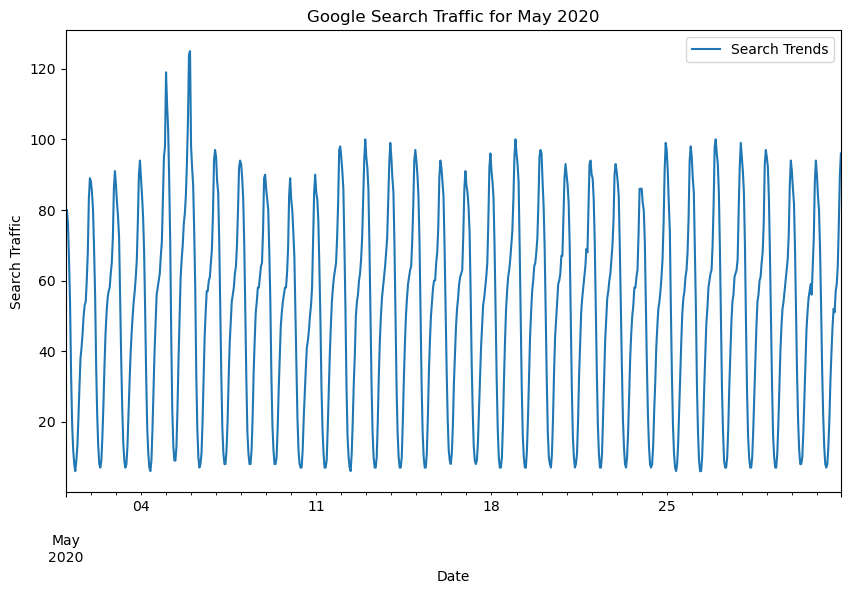

In [5]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05']
display(may_2020_data)

# Plot to visualize the data for May 2020
may_2020_data.plot(figsize=(10, 6), title="Google Search Traffic for May 2020")
plt.xlabel('Date')
plt.ylabel('Search Traffic')
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [8]:
# Check the column names in the DataFrame
print(df_mercado_trends.columns)


Index(['Search Trends'], dtype='object')


In [9]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data['Search Trends'].sum()
# View the traffic_may_2020 value
print(f"Total search traffic for May 2020: {traffic_may_2020}")




Total search traffic for May 2020: 38181


In [10]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.resample('M').sum()['Search Trends'].median()
# View the median_monthly_traffic value
print(f"Median monthly search traffic: {median_monthly_traffic}")

# View the median_monthly_traffic value


Median monthly search traffic: 35172.5


In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

In [ ]:
#yes

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

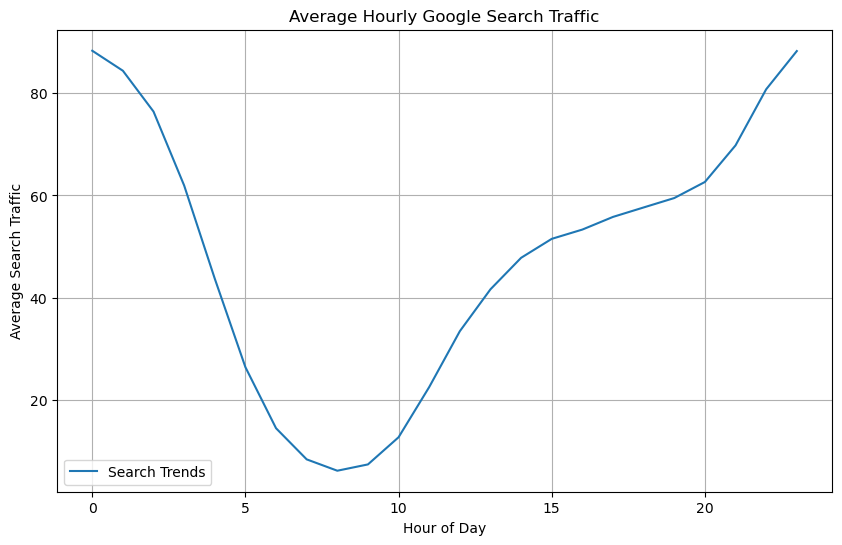

In [11]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
hourly_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()
hourly_traffic.plot(figsize=(10, 6), title="Average Hourly Google Search Traffic")
plt.xlabel('Hour of Day')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

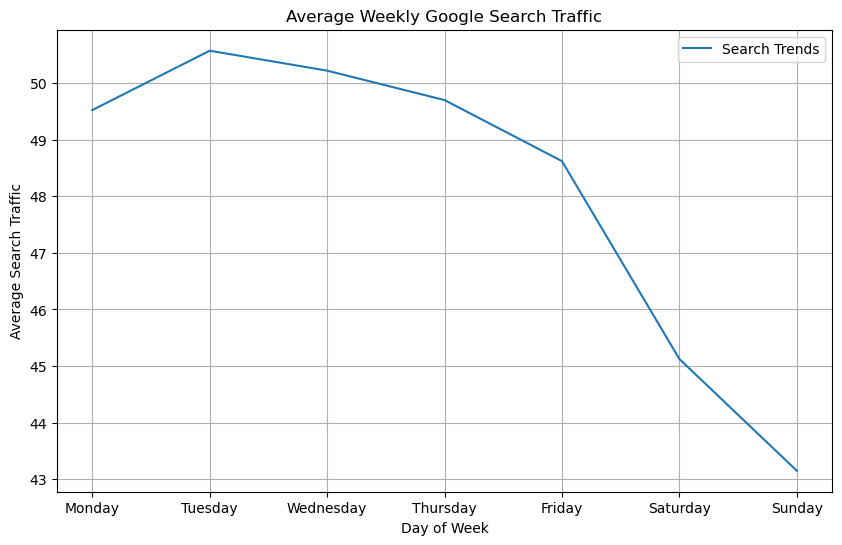

In [12]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
weekly_traffic = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean()
weekly_traffic.plot(figsize=(10, 6), title="Average Weekly Google Search Traffic")
plt.xlabel('Day of Week')
plt.ylabel('Average Search Traffic')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

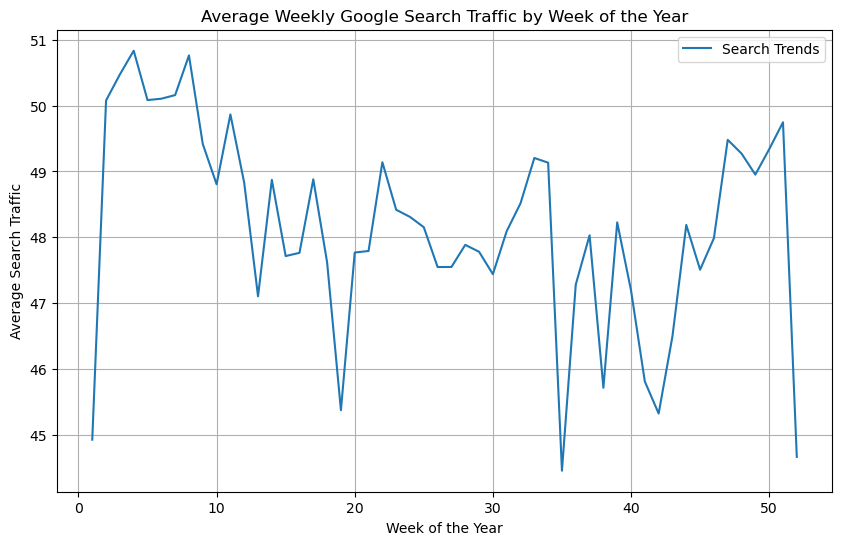

In [13]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
weekly_of_year_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()
weekly_of_year_traffic.plot(figsize=(10, 6), title="Average Weekly Google Search Traffic by Week of the Year")
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

Hourly Search Traffic
Hourly Peaks: The average search traffic has a distinct pattern throughout the day.
Morning: Traffic starts high around midnight and gradually decreases, reaching a low point around 5 AM.
Daytime: After 5 AM, traffic begins to increase steadily, peaking around late afternoon (4-5 PM).
Evening: There is a noticeable rise in traffic towards the late evening (9 PM).
Daily Search Traffic
Weekly Peaks: The average search traffic varies across the days of the week.
Midweek Highs: Traffic is highest on Tuesday, followed closely by Monday.
Weekend Lows: Traffic decreases towards the weekend, with the lowest search traffic occurring on Sunday.
Weekly Search Traffic
Seasonal Trends: The average search traffic varies throughout the weeks of the year.
Early Year Peaks: There are higher peaks early in the year (weeks 1-20).
Late Year Variability: Traffic shows significant variability in the later weeks of the year, with some noticeable spikes but also some lower points.
Holiday Period: There is no clear consistent increase during the winter holiday period (weeks 40 through 52), but there are spikes in certain weeks which might correspond to specific events or promotions.
Analysis
Hourly Trends: The company could focus marketing efforts in the late afternoon and evening when search traffic is highest. This could maximize visibility and engagement during peak interest periods.
Daily Trends: Marketing campaigns might be more effective if launched early in the week, especially on Monday and Tuesday, when search traffic is higher.
Seasonal Trends: While there are noticeable peaks and troughs throughout the year, specific marketing campaigns could be planned around the identified high-traffic weeks. Additionally, understanding the variability during the holiday period can help in fine-tuning campaigns for better impact.
By leveraging these insights, MercadoLibre can optimize its marketing strategies to align with periods of higher user interest, thereby maximizing the return on investment (ROI) from its marketing budget.

# Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [15]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


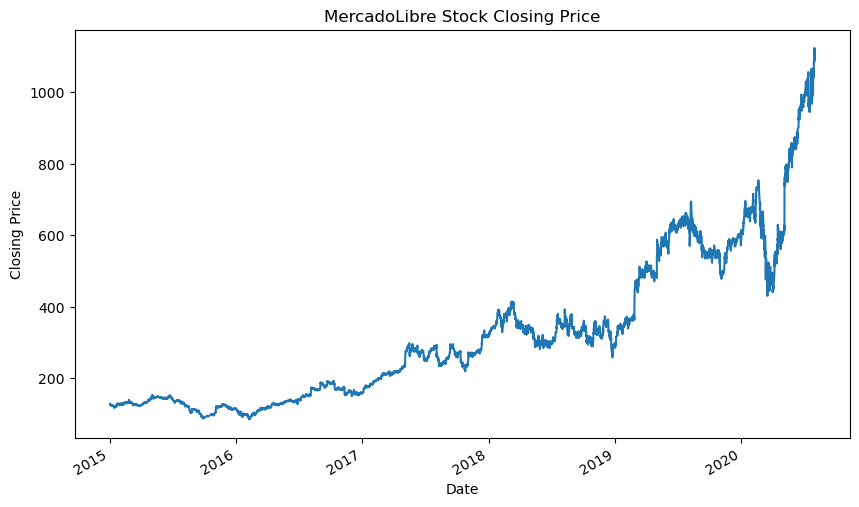

In [16]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(figsize=(10, 6), title="MercadoLibre Stock Closing Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [17]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [18]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


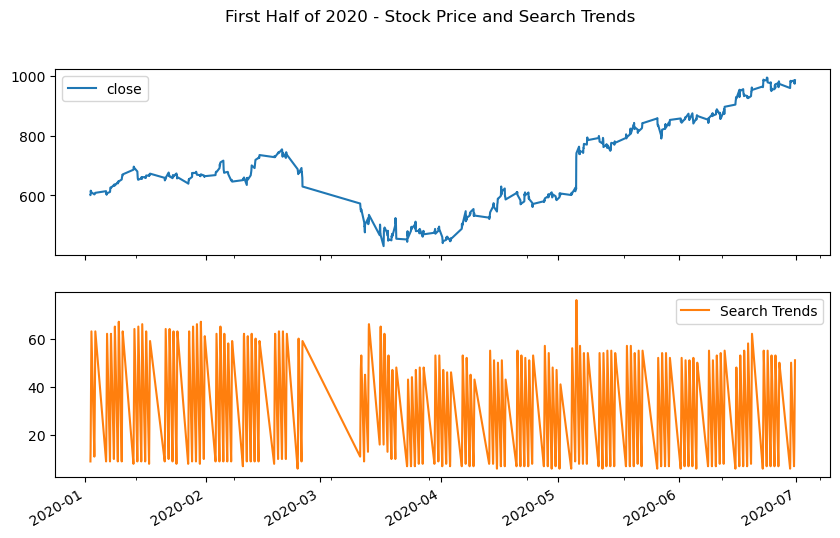

In [21]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(10, 6), title="First Half of 2020 - Stock Price and Search Trends")
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**Based on the plots:

Stock Price Trend:

The stock price shows a significant increase starting around mid-March 2020, which aligns with the narrative of increased interest in e-commerce platforms after the initial market shock.
Search Traffic Trend:

The search traffic data is more variable but shows an overall increasing trend, particularly around key dates.
Conclusion
Both time series data indicate a trend consistent with the narrative. After the initial market shock in early 2020, MercadoLibre's stock price began to rise significantly, reflecting increased investor confidence and company growth. Similarly, the search traffic data shows increased interest, aligning with the narrative of growing customer interest and revenue for e-commerce platforms during the period.

By analyzing these trends, we can support the hypothesis that there is a common trend between search traffic and stock price performance, reflecting broader market and consumer behavior patterns.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [22]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)


In [23]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std().ewm(span=4).mean()


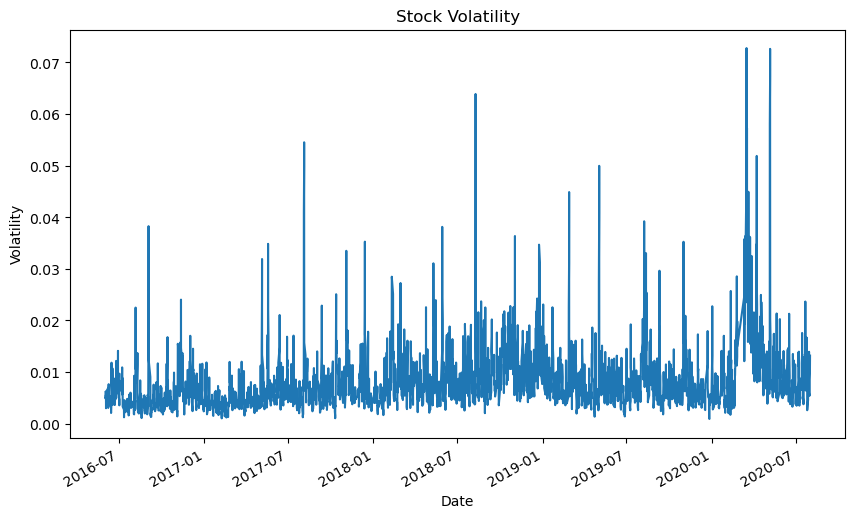

In [25]:
# Visualize the stock volatility

df_combined['Stock Volatility'].plot(figsize=(10, 6), title="Stock Volatility")
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [26]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

In [27]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.011976,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.012605,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.012881,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.012929,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013184,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [29]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
#mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
print(correlation_table)

                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.101543   
Lagged Search Trends         -0.101543              1.000000   
Hourly Stock Return           0.030849              0.017929   

                      Hourly Stock Return  
Stock Volatility                 0.030849  
Lagged Search Trends             0.017929  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**Correlation Analysis
Correlation Values:
Lagged Search Trends and Stock Volatility: -0.101543
Lagged Search Trends and Hourly Stock Return: 0.017929
Stock Volatility and Hourly Stock Return: 0.030849
Interpretation:
Lagged Search Trends and Stock Volatility:

The correlation value is -0.101543, indicating a weak negative correlation.
This suggests that there is a very slight tendency for stock volatility to decrease as lagged search trends increase, but the relationship is very weak and not strong enough to be considered predictive.
Lagged Search Trends and Hourly Stock Return:

The correlation value is 0.017929, indicating an extremely weak positive correlation.
This implies that there is almost no relationship between lagged search trends and hourly stock returns, meaning changes in search traffic are not predictive of changes in stock returns.
Stock Volatility and Hourly Stock Return:

The correlation value is 0.030849, indicating a very weak positive correlation.
This suggests that there is almost no relationship between stock volatility and hourly stock returns.
Conclusion:
Predictable Relationship:
The analysis shows that there is no strong or predictable relationship between lagged search traffic and stock volatility or between lagged search traffic and stock price returns. The correlation values are very close to zero, indicating weak or no linear relationships between these variables.
Therefore, it is unlikely that lagged search trends can be used as a reliable predictor for stock volatility or hourly stock returns in this context.
The lack of significant correlations implies that other factors, not captured by search traffic alone, are likely to be more influential in determining stock volatility and returns. This insight can help refine the focus of further analysis and modeling efforts to incorporate additional variables that might better capture the dynamics of stock price movements.








## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [30]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [31]:
# Call the Prophet function, store as an object
model = Prophet()

In [32]:
# Fit the time-series model.
model.fit(prophet_df)

16:05:11 - cmdstanpy - INFO - Chain [1] start processing
16:05:26 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)

future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')
# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [34]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame

forecast_mercado_trends = model.predict(future_mercado_trends)
# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,81.487088,97.843255,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,78.132173,95.066677,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.377451,83.920584,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,51.915313,69.401085,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,34.574879,52.089350,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

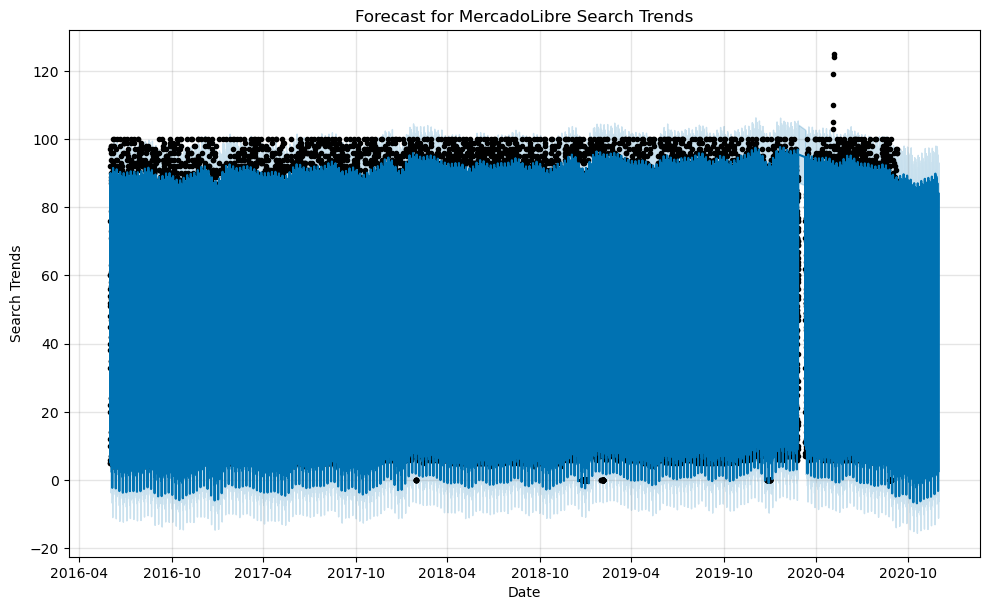

In [35]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_mercado_trends)
plt.title('Forecast for MercadoLibre Search Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**Near-Term Forecast Analysis
Trend:

The forecasted trend indicates a generally stable level of search traffic for MercadoLibre in the near term.
There is no significant upward or downward trend, suggesting that the popularity, as measured by search trends, is expected to remain relatively consistent.
Confidence Intervals:

The blue shaded area represents the 95% confidence interval of the forecast.
The model suggests that while the average search traffic is expected to remain stable, there is some variability expected around the mean value, as indicated by the width of the confidence interval.
Anomalies:

There are some visible outliers in the search trends data, particularly noticeable around the transition to 2020. These could be due to specific events or spikes in interest.
The model does account for these anomalies, but they do not significantly alter the overall stable forecast trend.
Insights:
Stability: The stable forecast suggests that the current level of interest in MercadoLibre is likely to continue in the near future. This is a positive indicator for consistent engagement with the platform.
Marketing Planning: With a stable forecast, marketing efforts can focus on maintaining the current level of engagement, while also planning for occasional spikes in interest.
Anomaly Monitoring: It is important to monitor for any anomalies or sudden changes in search trends that might indicate emerging opportunities or issues.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [36]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends_filtered = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]
display(forecast_mercado_trends_filtered.head())
display(forecast_mercado_trends_filtered.tail())


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,81.487088,97.843255
2016-06-01 01:00:00,86.106654,78.132173,95.066677
2016-06-01 02:00:00,75.784037,67.377451,83.920584
2016-06-01 03:00:00,60.517701,51.915313,69.401085
2016-06-01 04:00:00,43.403713,34.574879,52.089350


,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.507473,30.602253,47.806104
2020-11-30 05:00:00,24.036286,15.405785,32.626255
2020-11-30 06:00:00,12.070566,3.428352,20.752548
2020-11-30 07:00:00,4.798365,-3.573479,12.701065
2020-11-30 08:00:00,2.603438,-6.148574,11.012168


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

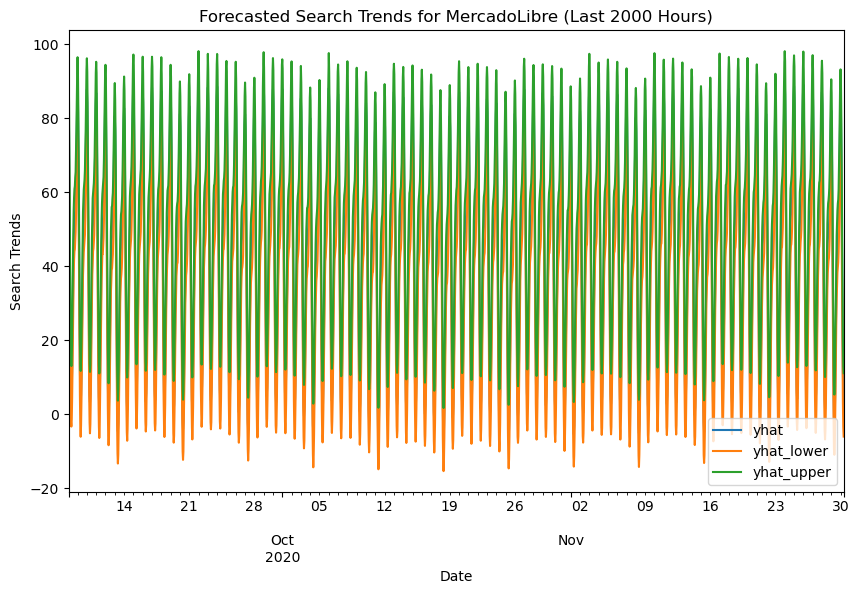

In [37]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends_filtered[-2000:].plot(figsize=(10, 6))
plt.title('Forecasted Search Trends for MercadoLibre (Last 2000 Hours)')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.show()

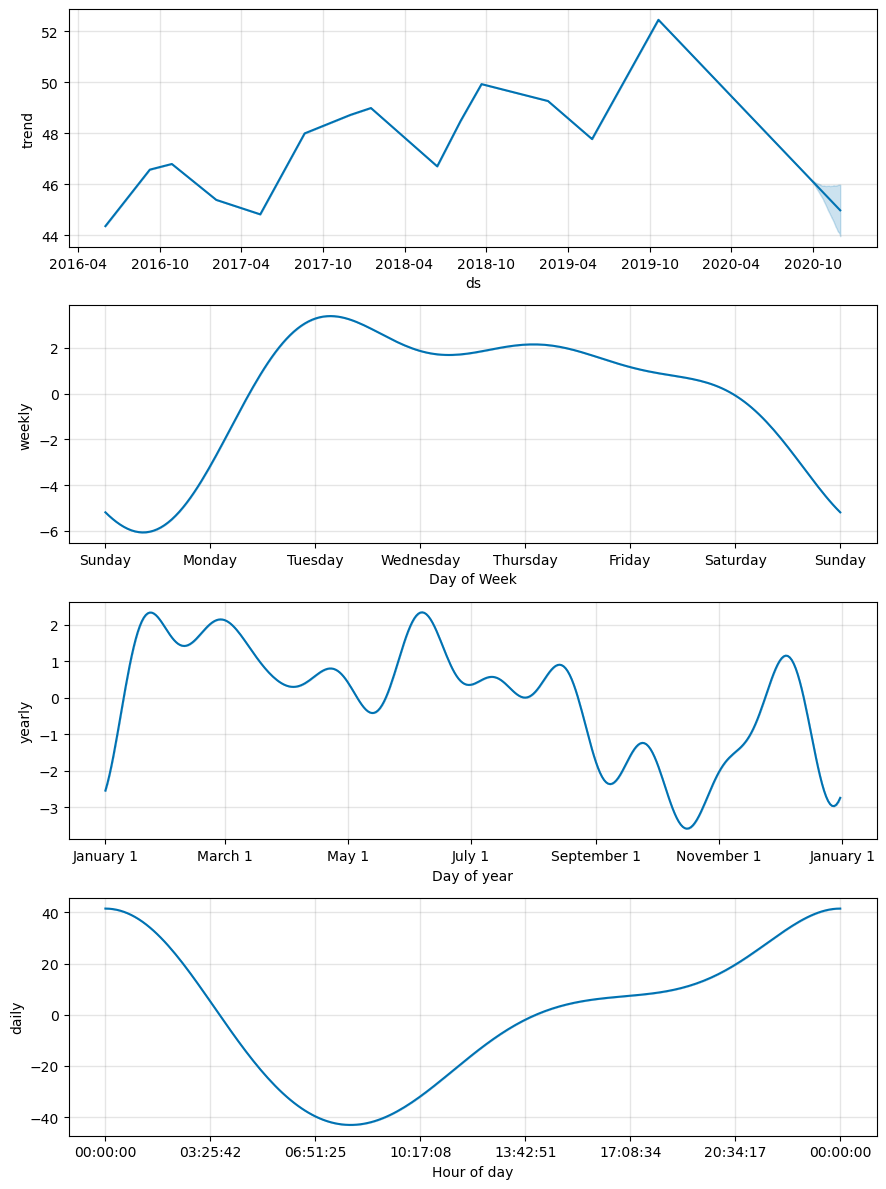

In [38]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
model.plot_components(forecast_mercado_trends)
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**The daily component plot shows that the highest search traffic occurs around midnight (00:00).
The search traffic then decreases steadily, reaching its lowest point around 6-7 AM, and starts increasing again throughout the day.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**The weekly component plot indicates that Tuesday experiences the highest search traffic.
The search traffic is relatively high on Monday and remains stable through Wednesday and Thursday, gradually decreasing towards the weekend, with Sunday having the lowest search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**The yearly component plot reveals that the lowest search traffic occurs around early September.
There is also a noticeable dip around the beginning of January, likely due to the post-holiday period.


By understanding these patterns, MercadoLibre can optimize its marketing and operational strategies:

Time of Day: Focus marketing efforts and promotions around midnight when search traffic is highest.
Day of the Week: Schedule major campaigns and activities early in the week, especially on Tuesdays, to maximize engagement.
Seasonal Trends: Plan special events or promotions to boost engagement during early September and early January when search traffic is typically lower.
These insights can help MercadoLibre enhance its user engagement and improve the effectiveness of its marketing strategies.